In [2]:
%config IPCompleter.greedy=True
import uproot
import numpy as np
import matplotlib.pylab as plt
import time

# Can change to false to exclude Up or Down data
up =True
down = True

start_time = time.time()
events_down = uproot.open("D:\\LabData\\B2HHH_MagnetDown.root")
events_up = uproot.open("D:\\LabData\\B2HHH_MagnetUp.root")

print(events_down["DecayTree"].keys())
k_mass = 493.677 #MeV
pi_mass = 139.570
histogram_plus = None
histogram_minus = None

# Xmax and Xmin must be multiples of 10 (in MeV)
xmin = 4500
xmax = 6000
hist_bins = int((xmax-xmin)/10)
# Min kaon probability
P_k_min = 0.61

mass_plus = []
mass_minus = []

if (down):
    # Iterate throws chunks of data
    for data in events_down[b"DecayTree"].iterate([b"H*_P[XYZ]", b"H*_ProbK",b"H*_Charge", b"H*_isMuon"]):
        
        # Compute invariant mass of particles and potential resonances
        invar_mass = np.sqrt((np.sqrt((k_mass**2) + data[b"H1_PX"]**2+data[b"H1_PY"]**2+data[b"H1_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2+data[b"H2_PY"]**2+data[b"H2_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2+data[b"H3_PY"]**2+data[b"H3_PZ"]**2))**2
        -(data[b"H1_PX"]+data[b"H2_PX"]+data[b"H3_PX"])**2-(data[b"H1_PY"]+data[b"H2_PY"]+data[b"H3_PY"])**2-
        (data[b"H1_PZ"]+data[b"H2_PZ"]+data[b"H3_PZ"])**2)
        
        mass12 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2 + data[b"H2_PY"]**2 + data[b"H2_PZ"]**2))**2)
        -(data[b"H1_PX"]+data[b"H2_PX"])**2 - (data[b"H1_PY"]+data[b"H2_PY"])**2 -(data[b"H1_PZ"]+data[b"H2_PZ"])**2
        
        mass13 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2 + data[b"H3_PY"]**2 + data[b"H3_PZ"]**2))**2 
        -(data[b"H1_PX"]+data[b"H3_PX"])**2 - (data[b"H1_PY"]+data[b"H3_PY"])**2 -(data[b"H1_PZ"]+data[b"H3_PZ"])**2)
         
        charge = data[b"H1_Charge"] + data[b"H2_Charge"] + data[b"H3_Charge"]
        
        
        for i in range(0,len(data[b"H1_ProbK"])):
            if(data[b"H1_ProbK"][i] < P_k_min or data[b"H2_ProbK"][i] < P_k_min or data[b"H3_ProbK"][i] < P_k_min):
                continue
            if(data[b"H1_isMuon"][i] == 1 or data[b"H2_isMuon"][i] == 1 or data[b"H3_isMuon"][i] == 1):
                continue
            if ((1839 < mass12[i] < 1899) or (1839 < mass13[i] < 1899)):
                    continue
            if (charge[i] == 1):
                mass_plus.append(invar_mass[i])
            elif (charge[i] == -1):
                mass_minus.append(invar_mass[i])


if (up): # Same as for down
    for data in events_up[b"DecayTree"].iterate([b"H*_P[XYZ]", b"H*_ProbK", b"H*_Charge", b"H*_isMuon"]):
        
        invar_mass = np.sqrt((np.sqrt((k_mass**2) + data[b"H1_PX"]**2+data[b"H1_PY"]**2+data[b"H1_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2+data[b"H2_PY"]**2+data[b"H2_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2+data[b"H3_PY"]**2+data[b"H3_PZ"]**2))**2
        -(data[b"H1_PX"]+data[b"H2_PX"]+data[b"H3_PX"])**2-(data[b"H1_PY"]+data[b"H2_PY"]+data[b"H3_PY"])**2-
        (data[b"H1_PZ"]+data[b"H2_PZ"]+data[b"H3_PZ"])**2)
        
        mass12 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2 + data[b"H2_PY"]**2 + data[b"H2_PZ"]**2))**2 
        -(data[b"H1_PX"]+data[b"H2_PX"])**2 - (data[b"H1_PY"]+data[b"H2_PY"])**2 -(data[b"H1_PZ"]+data[b"H2_PZ"])**2)
        
        mass13 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2 + data[b"H3_PY"]**2 + data[b"H3_PZ"]**2))**2 
        -(data[b"H1_PX"]+data[b"H3_PX"])**2 - (data[b"H1_PY"]+data[b"H3_PY"])**2 -(data[b"H1_PZ"]+data[b"H3_PZ"])**2)
        
        charge = data[b"H1_Charge"] + data[b"H2_Charge"] + data[b"H3_Charge"]
     
        for i in range(0,len(data[b"H1_ProbK"])):
            if(data[b"H1_isMuon"][i] or data[b"H2_isMuon"][i] or data[b"H3_isMuon"][i]):
                continue
            if(data[b"H1_ProbK"][i] < P_k_min or data[b"H2_ProbK"][i] < P_k_min or data[b"H3_ProbK"][i] < P_k_min):
                continue
            if ((1839 < mass12[i] < 1899) or (1839 < mass13[i] < 1899)):
                continue
            if (charge[i] == 1):
                mass_plus.append(invar_mass[i])
            elif (charge[i] == -1):
                mass_minus.append(invar_mass[i])
        
        
# Add to histogram
counts_plus, edges_plus = np.histogram(mass_plus, bins=hist_bins, range=(xmin, xmax))
counts_minus, edges_minus = np.histogram(mass_minus, bins=hist_bins, range=(xmin, xmax))
print("--- %s seconds ---" % (time.time() - start_time))


--- 29.13413429260254 seconds ---


Text(0.5, 1.0, 'Histogram of $B^+$ decays to kaons')

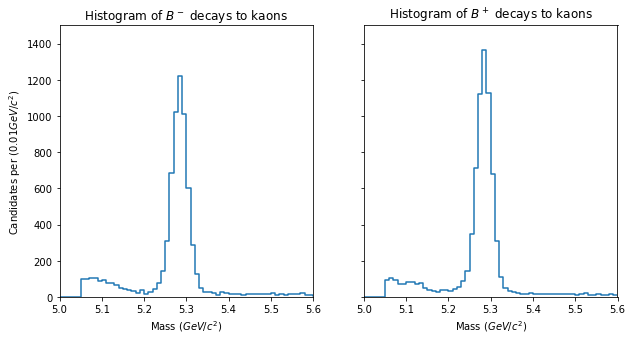

In [3]:

#plot histograms of the raw data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey = True, sharex = True)
fig.subplots_adjust(hspace=0)
axes[0].step(x=edges_minus/1000, y=np.append(counts_minus, 0), where="post")
axes[1].set_xlim(5.000, 5.600)
axes[0].set_ylim(0, counts_plus.max() * 1.1)
axes[0].set_xlabel("Mass ($GeV/c^2$)")
axes[0].set_title("Histogram of $B^-$ decays to kaons")
axes[0].set_ylabel("Candidates per ($0.01 GeV/c^2$)")

axes[1].step(x=edges_plus/1000, y=np.append(counts_plus, 0), where="post")
axes[1].set_xlabel("Mass ($GeV/c^2$)")
axes[1].set_title("Histogram of $B^+$ decays to kaons")


In [4]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import signal
import math
from scipy import special as sc

def exponential_func(x, N2, beta):
    return np.array(N2*np.exp(-beta*(x)))

def norm_pdf(x):
    return np.exp(-x**2/2.0) / np.sqrt(2*np.pi)

def norm_cdf(x):
    return sc.ndtr(x)

def gaussian_cdf(x,mu,sigma):
    return 0.5*(1+math.erf((x-mu)/(sigma*2**0.5)))

def gaussian_pdf(x,mu,sigma):
    return np.array(((sigma*(2*np.pi)**2))**(-1)*np.exp(-0.5*((x-mu)/sigma)**2))

def gaussian_func(x, N, mu, sigma):
    return(N *  gaussian_pdf(x, mu, sigma))

def gauss_exp(x, N1, m, sigma, N2, beta):
    return gaussian_func(x, N1, m, sigma) + exponential_func(x, N2, beta)

def gauss_exp_gauss(x, N1, m, sigma, N2, beta, N3, mu, sigma2):
    return gaussian_func(x, N1, m, sigma) + exponential_func(x, N2, beta) +  gaussian_func(x, N3, mu, sigma2)

def redchi(y, fit, err):
    return (np.sum(((y-fit)/err)**2)/len(y))

In [5]:
# limits for background
upper_expo = 6

In [6]:
# Getting initial estimate of background coeffs by fitting exponential to region where the combinatorial background dominates
invar_mass_plus = []
for i in range(1,len(edges_plus)): # skip when i = 0 and i - 1 = -1
    invar_mass_plus.append((edges_plus[i]+edges_plus[i-1])/2)
# Converting to GeV
invar_mass_plus = np.array(invar_mass_plus)/1000

# Getting initial estimate of background coeffs by fitting exponential to region where the combinatorial background dominates(negative charge)
invar_mass_minus = []
for i in range(1,len(edges_minus)): # skip when i = 0 and i - 1 = -1
    invar_mass_minus.append((edges_minus[i]+edges_minus[i-1])/2)

# Converting to GeV
invar_mass_minus = np.array(invar_mass_minus)/1000

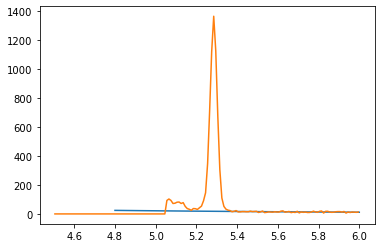

In [7]:
exp_mass = []
exp_counts = []
for i in range(0,len(invar_mass_plus)):
    # Get region of graph where background dominates
    if invar_mass_plus[i] >= 5.35 and invar_mass_plus[i] <= upper_expo:
        exp_mass.append(invar_mass_plus[i])
        exp_counts.append(counts_plus[i])
    
# Fit exponential
exp_init_coeffs_plus, cov = curve_fit(exponential_func,exp_mass,exp_counts, p0=(1, 1e-6)) 

# Plotting fit
x_fit = np.linspace(4.8,6,100)
y_fit = exponential_func(x_fit,exp_init_coeffs_plus[0],exp_init_coeffs_plus[1])
plt.plot(x_fit,y_fit)
plt.plot(invar_mass_plus,counts_plus)

In [8]:
exp_mass = []
exp_counts = []
for i in range(0,len(invar_mass_minus)):
    # Get region of graph where background dominates
    if invar_mass_minus[i] >= 5.35 and invar_mass_minus[i] <= upper_expo:
        exp_mass.append(invar_mass_minus[i])
        exp_counts.append(counts_minus[i])
    
# Fit exponential
exp_init_coeffs_minus, cov = curve_fit(exponential_func,exp_mass,exp_counts, p0=(1, 1e-6)) 

# Plotting fit
x_fit = np.linspace(4.8,6,100)
y_fit = exponential_func(x_fit,exp_init_coeffs_minus[0],exp_init_coeffs_minus[1])
# plt.plot(x_fit,y_fit)
# plt.plot(invar_mass_minus,counts_minus)

[8.95963720e+02 5.28467900e+00 1.73510945e-02 9.57745175e+05
 1.96369372e+00]


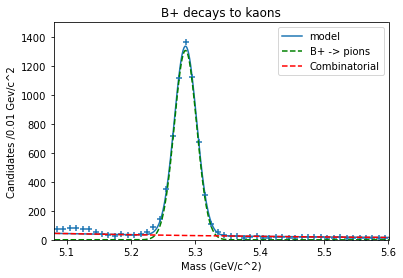

In [9]:
# Educated guess at cruijff coeffs
# alpha and n expected to change the most
# [N, m, sigma , alpha_l, alpha_r]
gauss_init = [3500, 5.29, 0.015]
# Get region where cruijffal and exponential dominate
gauss_mass = []
gauss_counts = []
for i in range(0,len(invar_mass_plus)):
    if invar_mass_plus[i] >= 5.15 and invar_mass_plus[i] <= upper_expo:
        gauss_mass.append(invar_mass_plus[i])
        gauss_counts.append(counts_plus[i])

# Convert to same type as crys_init_coeffs
exp_init_coeffs = [exp_init_coeffs_plus[0], exp_init_coeffs_plus[1]]
# Create tuple of initial estimates of the cruijffal and exponential coeffs
p0_init_est = tuple(gauss_init + exp_init_coeffs)
#print(p0_init_est)
#p0_init_est = tuple(cruijff_init + [10000,1])
coeffs_p, cov_p = curve_fit(gauss_exp, gauss_mass, gauss_counts, p0 = p0_init_est)
print(coeffs_p)
fit_x = np.linspace(4.5,6,1000)
fit_y_p = (gauss_exp(fit_x, coeffs_p[0],coeffs_p[1], coeffs_p[2],coeffs_p[3],coeffs_p[4]))

plt.xlim(xmin = 5.08, xmax = 5.6)
plt.ylim(0,counts_plus.max() * 1.1)
plt.plot(fit_x,fit_y_p, label = "model") # Sum of exp + cruijff
plt.scatter(invar_mass_plus,counts_plus,marker= "+") # Raw data
plt.plot(fit_x, gaussian_func(fit_x,coeffs_p[0],coeffs_p[1], coeffs_p[2]),"g--", label = "B+ -> pions") # Crytal alone
plt.plot(fit_x,coeffs_p[3]*np.exp(-coeffs_p[4]*fit_x),"r--", label = "Combinatorial") # Exp alone
plt.legend()
plt.xlabel("Mass (GeV/c^2)")
plt.ylabel("Candidates /0.01 Gev/c^2")
plt.title("B+ decays to kaons")
plt.show()

[8.17979031e+02 5.28439464e+00 1.76452182e-02 4.72813211e+05
 1.84322280e+00]


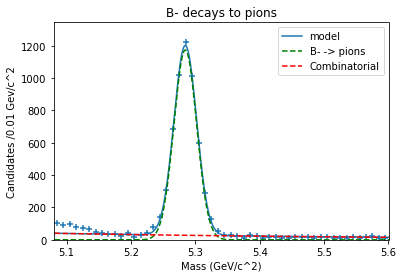

In [10]:
# Educated guess at cruijff coeffs
# alpha and n expected to change the most
# [N, m, sigma , alpha_l, alpha_r]
gauss_init = [3500, 5.29, 0.015]
# Get region where cruijffal and exponential dominate
gauss_mass = []
gauss_counts = []
for i in range(0,len(invar_mass_minus)):
    if invar_mass_minus[i] >= 5.15 and invar_mass_minus[i] <= upper_expo:
        gauss_mass.append(invar_mass_minus[i])
        gauss_counts.append(counts_minus[i])

# Convert to same type as crys_init_coeffs
exp_init_coeffs = [exp_init_coeffs_minus[0], exp_init_coeffs_minus[1]]
# Create tuple of initial estimates of the cruijffal and exponential coeffs
p0_init_est = tuple(gauss_init + exp_init_coeffs)
#print(p0_init_est)
#p0_init_est = tuple(cruijff_init + [10000,1])
coeffs_m, cov_m = curve_fit(gauss_exp, gauss_mass, gauss_counts, p0 = p0_init_est)
print(coeffs_m)
fit_x = np.linspace(4.5,6,1000)
fit_y_m = (gauss_exp(fit_x, coeffs_m[0],coeffs_m[1], coeffs_m[2],coeffs_m[3],coeffs_m[4]))

plt.xlim(xmin = 5.08, xmax = 5.6)
plt.ylim(0,counts_minus.max() * 1.1)
plt.plot(fit_x,fit_y_m, label = "model") # Sum of exp + cruijff
plt.scatter(invar_mass_minus,counts_minus,marker= "+") # Raw data
plt.plot(fit_x, gaussian_func(fit_x,coeffs_m[0],coeffs_m[1], coeffs_m[2]),"g--", label = "B- -> pions") # Crytal alone
plt.plot(fit_x,coeffs_m[3]*np.exp(-coeffs_m[4]*fit_x),"r--", label = "Combinatorial") # Exp alone
plt.legend()
plt.xlabel("Mass (GeV/c^2)")
plt.ylabel("Candidates /0.01 Gev/c^2")
plt.title("B- decays to pions")
plt.show()

In [11]:
# Gaussian reconstruction of 4 - body backround

gauss_mass_p = []
gauss_counts_p = []
for i in range(0, len(invar_mass_plus)):
    # Guess at valid region unsure if correct 
    if invar_mass_plus[i] >= 5.04 and invar_mass_plus[i] <= 6:  # ?
        gauss_mass_p.append(invar_mass_plus[i])
        gauss_counts_p.append(counts_plus[i]) 

gauss_est = [300, 5.1, 0.05]
x = np.linspace(4,6,100)
model_params_p = []
for par in coeffs_p:
    model_params_p.append(par)
for par in gauss_est:
    model_params_p.append(par)
p0 = tuple(model_params_p)

params_p, cov_p = curve_fit(gauss_exp_gauss, gauss_mass_p, gauss_counts_p, p0 = p0)

In [12]:
gauss_mass_m = []
gauss_counts_m = []
for i in range(0, len(invar_mass_minus)):
    # Guess at valid region unsure if correct 
    if invar_mass_minus[i] >= 5.04 and invar_mass_minus[i] <= 6:  # ?
        gauss_mass_m.append(invar_mass_minus[i])
        gauss_counts_m.append(counts_minus[i])

gauss_est = [500, 5.08, 0.05]
model_params_m = []
for par in coeffs_m:
    model_params_m.append(par)
for par in gauss_est:
    model_params_m.append(par)
p0 = tuple(model_params_m)

params_m, cov_m = curve_fit(gauss_exp_gauss ,gauss_mass_m, gauss_counts_m, p0 = p0)

1.839782801801775
1.9481694548083612
-0.04474157515757965
0.003810432762812694


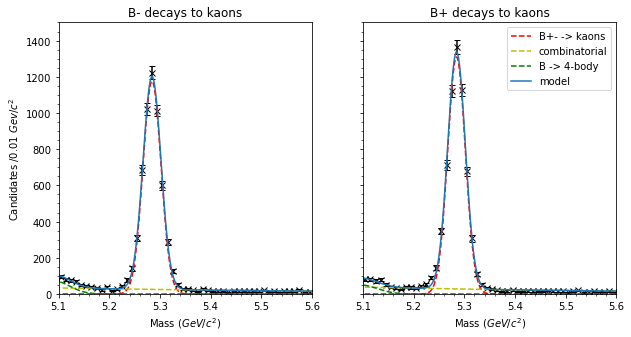

In [13]:
from scipy import integrate
from matplotlib.ticker import AutoMinorLocator


fit_x = np.linspace(4.9,5.6,1000)
gauss_p, exp_p, fbody_p = params_p[0:3], params_p[3:5], params_p[5:8]
gauss_m, exp_m, fbody_m = params_m[0:3], params_m[3:5], params_m[5:8]

fit_y_p = gauss_exp_gauss(fit_x, params_p[0], params_p[1], params_p[2], params_p[3], params_p[4], params_p[5], params_p[6], params_p[7])
fit_y_m = gauss_exp_gauss(fit_x, params_m[0], params_m[1], params_m[2], params_m[3], params_m[4], params_m[5], params_m[6], params_m[7]) 

# Initial plot settings
fig, (axe0,axe1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey = True, sharex = True)
fig.subplots_adjust(hspace=0)
axe0.set_xlim(5.1, 5.6)
axe0.set_ylim(0, counts_plus.max() * 1.1)

# Plot of the B- decay mass
axe0.plot(invar_mass_minus,counts_minus, 'kx') # Raw data
axe0.errorbar(invar_mass_minus,counts_minus,np.sqrt(counts_minus), capsize = 3, ls = "none", c= 'k')
axe0.plot(fit_x,gaussian_func(fit_x, gauss_m[0], gauss_m[1], gauss_m[2]),"r--", label = "B+- -> kaons") 
axe0.plot(fit_x,exp_m[0]*np.exp(-exp_m[1]*fit_x),"y--", label = "combinatorial") 
axe0.plot(fit_x,gaussian_func(fit_x, fbody_m[0], fbody_m[1], fbody_m[2]),"g--", label = "B -> 4-body") 
axe0.plot(fit_x,fit_y_m, label = "model") 
axe0.set_xlabel("Mass $(GeV/c^2)$")
axe0.set_ylabel("Candidates /0.01 $Gev/c^2$")
axe0.set_title("B- decays to kaons")

# Plot of the B+ decay mass
axe1.plot(invar_mass_plus,counts_plus, "kx") # Raw data
axe1.errorbar(invar_mass_plus,counts_plus,np.sqrt(counts_plus), capsize = 3, ls = "none", c= 'k')
axe1.plot(fit_x,gaussian_func(fit_x, gauss_p[0], gauss_p[1], gauss_p[2]),"r--", label = "B+- -> kaons") 
axe1.plot(fit_x,exp_p[0]*np.exp(-exp_p[1]*fit_x),"y--", label = "combinatorial") 
axe1.plot(fit_x,gaussian_func(fit_x, fbody_p[0], fbody_p[1], fbody_p[2]),"g--", label = "B -> 4-body") 
axe1.plot(fit_x,fit_y_p, label = "model") 
axe1.legend()
axe1.set_xlabel("Mass $(GeV/c^2)$")
axe1.set_title("B+ decays to kaons")

# Get ticks on graphs
axe0.xaxis.set_minor_locator(AutoMinorLocator())
axe0.yaxis.set_minor_locator(AutoMinorLocator())
axe1.xaxis.set_minor_locator(AutoMinorLocator())
axe1.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig("..//..//figures//massspectrakaondown.pdf")

# Get num events
N_p = integrate.quad(gaussian_func, 5.1, 5.5, args = (gauss_p[0],gauss_p[1], gauss_p[2]))[0]
N_m = integrate.quad(gaussian_func, 5.1, 5.5,args = (gauss_m[0], gauss_m[1], gauss_m[2]))[0]
Ne_p = np.sqrt(np.pi * (( (gauss_p[2]**2) * cov_p[0][0] + (gauss_p[0]**2) * cov_p[2][2])))
Ne_m = np.sqrt(np.pi * (( (gauss_m[2]**2) * cov_m[0][0] + (gauss_m[0]**2) * cov_m[2][2])))

errp = (((2*N_m)/(N_m+N_p)**2)**2)*(Ne_p**2)
errm = (((2*N_p)/(N_m+N_p)**2)**2)*(Ne_m**2)
err = np.sqrt((errm+errp))


gauss_mass_tm = []
gauss_counts_tm = []
for i in range(0,len(gauss_counts_m)): # remove 0s
    if gauss_counts_m[i] != 0:
        gauss_mass_tm.append(gauss_mass_m[i])
        gauss_counts_tm.append(gauss_counts_m[i])
        
gauss_mass_tm = np.array(gauss_mass_tm)
gauss_counts_tm = np.array(gauss_counts_tm)
staterrm = np.sqrt(gauss_counts_tm)
fitm = gauss_exp_gauss(gauss_mass_tm, params_m[0], params_m[1], params_m[2], params_m[3], params_m[4], params_m[5], params_m[6], params_m[7])

gauss_mass_tp = []
gauss_counts_tp = []
for i in range(0,len(gauss_counts_p)): # remove 0s
    if gauss_counts_p[i] != 0:
        gauss_mass_tp.append(gauss_mass_p[i])
        gauss_counts_tp.append(gauss_counts_p[i])


staterrp = np.sqrt(gauss_counts_tp)
gauss_mass_tp = np.array(gauss_mass_tp)
fitp = gauss_exp_gauss(gauss_mass_tp, params_p[0], params_p[1], params_p[2], params_p[3], params_p[4], params_p[5], params_p[6], params_p[7])
print(redchi(gauss_counts_tp, fitp, staterrp))


print((N_m-N_p)/(N_m+N_p))
print(err)


In [80]:
# Can change to false to exclude Up or Down data
up = True
down = True

start_time = time.time()
events_down = uproot.open("D:\\LabData\\B2HHH_MagnetDown.root")
events_up = uproot.open("D:\\LabData\\B2HHH_MagnetUp.root")

print(events_down["DecayTree"].keys())
k_mass = 493.677 #MeV
pi_mass = 139.570

# Xmax and Xmin must be multiples of 10 (in MeV)
xmin = 4500
xmax = 6000
hist_bins = int((xmax-xmin)/10)
# Min pion probability
P_k_min = 0.6

invarp = []
mp_high = []
mp_low = []

invarm = []
mm_high = []
mm_low = []

if (down):
    # Computes invariant mass
    for data in events_down[b"DecayTree"].iterate([b"H*_P[XYZ]", b"H*_ProbK",b"H*_Charge", b"H*_isMuon"]):
        
        invar_mass = np.sqrt((np.sqrt((k_mass**2) + data[b"H1_PX"]**2+data[b"H1_PY"]**2+data[b"H1_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2+data[b"H2_PY"]**2+data[b"H2_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2+data[b"H3_PY"]**2+data[b"H3_PZ"]**2))**2
        -(data[b"H1_PX"]+data[b"H2_PX"]+data[b"H3_PX"])**2-(data[b"H1_PY"]+data[b"H2_PY"]+data[b"H3_PY"])**2-
        (data[b"H1_PZ"]+data[b"H2_PZ"]+data[b"H3_PZ"])**2)
        
        mass12 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2 + data[b"H2_PY"]**2 + data[b"H2_PZ"]**2))**2
        -(data[b"H1_PX"]+data[b"H2_PX"])**2 - (data[b"H1_PY"]+data[b"H2_PY"])**2 -(data[b"H1_PZ"]+data[b"H2_PZ"])**2)
        
        mass13 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2 + data[b"H3_PY"]**2 + data[b"H3_PZ"]**2))**2 
        -(data[b"H1_PX"]+data[b"H3_PX"])**2 - (data[b"H1_PY"]+data[b"H3_PY"])**2 -(data[b"H1_PZ"]+data[b"H3_PZ"])**2)
         
        charge = data[b"H1_Charge"] + data[b"H2_Charge"] + data[b"H3_Charge"]
        
        for i in range(0,len(data[b"H1_ProbK"])):
            if(data[b"H1_ProbK"][i] < P_k_min or data[b"H2_ProbK"][i] < P_k_min or data[b"H3_ProbK"][i] < P_k_min):
                continue
            if(data[b"H1_isMuon"][i] == 1 or data[b"H2_isMuon"][i] == 1 or data[b"H3_isMuon"][i] == 1):
                continue
            if ((1839 < mass12[i] < 1899) or (1839 < mass13[i] < 1899)):
                    continue
            # Seperate by high and low  mass and charge
            if (charge[i] == 1):
                invarp.append(invar_mass[i])
                if (mass12[i] > mass13[i]):
                    mp_high.append(mass12[i])
                    mp_low.append(mass13[i])
                else:
                    mp_high.append(mass13[i])
                    mp_low.append(mass12[i])   
            elif (charge[i] == -1):
                invarm.append(invar_mass[i])
                if (mass12[i] > mass13[i]):
                    mm_high.append(mass12[i])
                    mm_low.append(mass13[i])
                else:
                    mm_high.append(mass13[i])
                    mm_low.append(mass12[i])


if (up): # Same as for down
    for data in events_up[b"DecayTree"].iterate([b"H*_P[XYZ]", b"H*_ProbK", b"H*_Charge", b"H*_isMuon"]):
        
        invar_mass = np.sqrt((np.sqrt((k_mass**2) + data[b"H1_PX"]**2+data[b"H1_PY"]**2+data[b"H1_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2+data[b"H2_PY"]**2+data[b"H2_PZ"]**2)+
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2+data[b"H3_PY"]**2+data[b"H3_PZ"]**2))**2
        -(data[b"H1_PX"]+data[b"H2_PX"]+data[b"H3_PX"])**2-(data[b"H1_PY"]+data[b"H2_PY"]+data[b"H3_PY"])**2-
        (data[b"H1_PZ"]+data[b"H2_PZ"]+data[b"H3_PZ"])**2)
        
        mass12 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H2_PX"]**2 + data[b"H2_PY"]**2 + data[b"H2_PZ"]**2))**2 
        -(data[b"H1_PX"]+data[b"H2_PX"])**2 - (data[b"H1_PY"]+data[b"H2_PY"])**2 -(data[b"H1_PZ"]+data[b"H2_PZ"])**2)
        
        mass13 = np.sqrt(((np.sqrt(k_mass**2 + data[b"H1_PX"]**2 + data[b"H1_PY"]**2+ data[b"H1_PZ"]**2)) + 
        np.sqrt((k_mass**2) + data[b"H3_PX"]**2 + data[b"H3_PY"]**2 + data[b"H3_PZ"]**2))**2 
        -(data[b"H1_PX"]+data[b"H3_PX"])**2 - (data[b"H1_PY"]+data[b"H3_PY"])**2 -(data[b"H1_PZ"]+data[b"H3_PZ"])**2)
        
        charge = data[b"H1_Charge"] + data[b"H2_Charge"] + data[b"H3_Charge"]
     
        for i in range(0,len(data[b"H1_ProbK"])):
            if(data[b"H1_isMuon"][i] or data[b"H2_isMuon"][i] or data[b"H3_isMuon"][i]):
                continue
            if(data[b"H1_ProbK"][i] < P_k_min or data[b"H2_ProbK"][i] < P_k_min or data[b"H3_ProbK"][i] < P_k_min):
                continue
            if ((1839 < mass12[i] < 1899) or (1839 < mass13[i] < 1899)):
                continue
            if (charge[i] == 1):
                invarp.append(invar_mass[i])
                if (mass12[i] > mass13[i]):
                    mp_high.append(mass12[i])
                    mp_low.append(mass13[i])
                else:
                    mp_high.append(mass13[i])
                    mp_low.append(mass12[i])   
            elif (charge[i] == -1):
                invarm.append(invar_mass[i])
                if (mass12[i] > mass13[i]):
                    mm_high.append(mass12[i])
                    mm_low.append(mass13[i])
                else:
                    mm_high.append(mass13[i])
                    mm_low.append(mass12[i])
        
print("--- %s seconds ---" % (time.time() - start_time))
        
mp_h = (np.array(mp_high)/1000)**2
mp_l = (np.array(mp_low)/1000)**2
invarp = np.array(invarp)/1000

mm_h = (np.array(mm_high)/1000)**2
mm_l = (np.array(mm_low)/1000)**2
invarm = np.array(invarm)/1000


[b'B_FlightDistance', b'B_VertexChi2', b'H1_PX', b'H1_PY', b'H1_PZ', b'H1_ProbK', b'H1_ProbPi', b'H1_Charge', b'H1_IPChi2', b'H1_isMuon', b'H2_PX', b'H2_PY', b'H2_PZ', b'H2_ProbK', b'H2_ProbPi', b'H2_Charge', b'H2_IPChi2', b'H2_isMuon', b'H3_PX', b'H3_PY', b'H3_PZ', b'H3_ProbK', b'H3_ProbPi', b'H3_Charge', b'H3_IPChi2', b'H3_isMuon']
--- 10.694169998168945 seconds ---


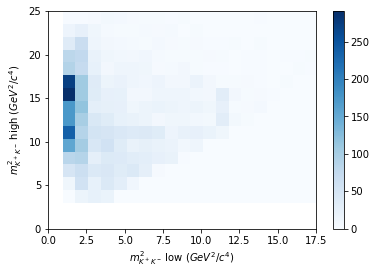

In [81]:
cmap = cm.get_cmap(name='bwr')
plt.hist2d( mp_l, mp_h, bins= (20,20), cmap = plt.cm.Blues)
plt.xlim(0,17.5)
plt.ylim(0,25)
plt.colorbar()
plt.xlabel("$m_{K^+K^-}^2$ low ($GeV^2/c^4$)")
plt.ylabel("$m_{K^+K^-}^2$ high ($GeV^2/c^4$)")
plt.savefig("C:\\Users\\benjr\\MPHYS 2\\figures\\kaonhist.pdf")


In [82]:
def exp_integral(x, N, beta, start, end):
    return (N / beta) * np.exp(-beta * start) - (N / beta) * np.exp(-beta * end)

# Get background region eqaul to approximatly one
sbp = 5.4
ebp = 5.6
test = exp_integral(x, exp_p[0], exp_p[1], gauss_p[1] - 3*gauss_p[2], gauss_p[1] + 3*gauss_p[2])/(exp_integral(x, exp_p[0], exp_p[1], sbp, ebp))
while 0.99999 > test or test > 1.00001:
    ebp = np.random.uniform(low=5.45, high=5.6, size=(1,))
    test = exp_integral(x, exp_p[0], exp_p[1], gauss_p[1] - 3*gauss_p[2], gauss_p[1] + 3*gauss_p[2])/(exp_integral(x, exp_p[0], exp_p[1], sbp, ebp))
    
sbm = 5.4
ebm = 5.6
test = exp_integral(x, exp_m[0], exp_m[1], gauss_m[1] - 3*gauss_m[2], gauss_m[1] + 3*gauss_m[2])/(exp_integral(x, exp_m[0], exp_m[1], sbm, ebm))
while 0.99999 > test or test > 1.00001:
    ebm = np.random.uniform(low=5.45, high=5.6, size=(1,))
    test = exp_integral(x, exp_m[0], exp_m[1], gauss_m[1] - 3*gauss_m[2], gauss_m[1] + 3*gauss_m[2])/(exp_integral(x, exp_m[0], exp_m[1], sbm, ebm))


KeyboardInterrupt: 

In [ ]:
# Invariant mass of signal dalitz points for B+
invarpd = []
# m1m2 low high signal
mpld = []
mphd = []
# m1m2 low high background
mplb = []
mphb = []

# Same but for B-
invarmd = []
mmld = []
mmhd = []
mmlb = []
mmhb = []

# Signal region from previous fit
gp_start = gauss_p[1] - 3*gauss_p[2]
gp_end = gauss_p[1] + 3*gauss_p[2]
for i in range(0,len(invarp)):
    if (gp_start < invarp[i] < gp_end):
        invarpd.append(invarp[i])
        mpld.append(mp_l[i])
        mphd.append(mp_h[i])
    elif (sbp < invarp[i] < ebp):
        mplb.append(mp_l[i])
        mphb.append(mp_h[i])


gm_start = gauss_m[1] - 3*gauss_m[2]
gm_end = gauss_m[1] + 3*gauss_m[2]
for i in range(0,len(invarm)):
    if (gm_start < invarm[i] < gm_end):
        invarmd.append(invarm[i])
        mmld.append(mm_l[i])
        mmhd.append(mm_h[i])
    elif (sbm < invarm[i] < ebm):
        mmlb.append(mm_l[i])
        mmhb.append(mm_h[i])
        
# Bin defintion
xedges = np.append(np.append(np.linspace(0,2,5),np.linspace(2,4,4)), np.linspace(4, 14, 5))
yedges = np.linspace(0,28,10)



signalbackp, edges1, edges2 = np.histogram2d(mpld, mphd, bins =  (xedges, yedges))
signalbackm, edges1, edges2  = np.histogram2d(mmld, mmhd, bins = (xedges, yedges))

# Background
bgp, e1, e2 = np.histogram2d(mplb, mphb, bins =  (xedges, yedges))
bgm, e3, e4 = np.histogram2d(mmlb, mmhb,bins =  (xedges, yedges))

# Background subtracted signal remove less than zero entries
signalp = (signalbackp - bgp).clip(min = 0)
signalm = (signalbackm - bgm).clip(min = 0)

esignalp = (np.sqrt(signalp) + np.sqrt(bgp)).clip(min = 0)
esignalm = (np.sqrt(signalm) + np.sqrt(bgm)).clip(min = 0)


errp = (((2*signalm)/(signalm+signalp)**2)**2)*(esignalp**2)
errm = (((2*signalp)/(signalm+signalp)**2)**2)*(esignalm**2)
err = np.nan_to_num(np.sqrt((errm+errp)))

plt.figure()
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]

A = (signalm-signalp)/(signalm+signalp)
A = np.nan_to_num(A)
diverr = (A/err)

plt.figure()
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]

from matplotlib import colors as c
from matplotlib import cm
import matplotlib.colors as colors

yy, xx = np.meshgrid(yedges, xedges)
fig, ax = plt.subplots()
cmap = cm.get_cmap(name='bwr')
divnorm = colors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
divnormerr = colors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)

#cmap = cm.get_cmap(name='bwr')
#cmap = c.ListedColormap(['bwr']
plot = ax.pcolormesh(xx, yy, A, cmap = cmap, norm = divnorm)
#plot = ax.pcolormesh(xx, yy, A/err)#, norm = divnormerr, cmap = cmap)
#plot1 = ax.pcolormesh(xx, yy, err) # , norm = divnorm, cmap = cmap)
fig.colorbar(plot)
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlabel("$m_{K^+K^-}^2$ low ($GeV^2/c^4$)")
ax.set_ylabel("$m_{K^+K^-}^2$ high ($GeV^2/c^4$)")
#ax.set_title("Asymmetry of bins in Dalitz plot (B -> Kaons)")
plt.savefig("C:\\Users\\benjr\\MPHYS 2\\figures\\A.pdf")



#xx, yy = np.meshgrid(xvalues, yvalues)
yy, xx = np.meshgrid(yedges, xedges)
fig, ax = plt.subplots()
cmap=plt.cm.Blues
divnorm = colors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
divnormerr = colors.TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)
plot = ax.pcolormesh(xx, yy, err, cmap = cmap, vmin=0, vmax=0.4)
fig.colorbar(plot)
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlabel("$m_{K^+K^-}^2$ low ($GeV^2/c^4$)")
ax.set_ylabel("$m_{K^+K^-}^2$ high ($GeV^2/c^4$)")

#plt.savefig("C:\\Users\\benjr\\MPHYS 2\\figures\\kaonerr.pdf")
yy, xx = np.meshgrid(yedges, xedges)
fig, ax = plt.subplots()

divnorm = colors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.4)
divnormerr = colors.TwoSlopeNorm(vmin=-3, vcenter=0, vmax=3)

cmap = cm.get_cmap(name='bwr')
plot = ax.pcolormesh(xx, yy, A/err, cmap=cmap)
fig.colorbar(plot)
from matplotlib.ticker import AutoMinorLocator
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlabel("$m_{K^+K^-}^2$ low ($GeV^2/c^4$)")
ax.set_ylabel("$m_{K^+K^-}^2$ high ($GeV^2/c^4$)")


#plt.savefig("C:\\Users\\benjr\\MPHYS 2\\figures\\kaonAerr.pdf")
#fig.colorbar(plot1)


In [ ]:
nm = sum(sum(signalm))
npa = sum(sum(signalp))
A = (nm-npa)/(npa+nm)

ep = sum(sum(esignalp))
em = sum(sum(esignalm))
errp = (((2*nm)/(nm+npa)**2)**2)*(ep**2)
errm = (((2*npa)/(nm+npa)**2)**2)*(em**2)
err = (errm+errp)**0.5
print(A)
print(err)

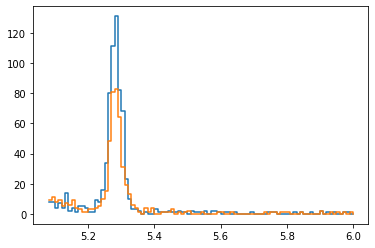

In [93]:
xamx = 6
xmin = 5.08
bins = int((6000-5080)/10)
invar_dal_p = []
for i in range(0, len(invarp)):
    if ( mp_h[i] < 15 and 1.2 < mp_l[i] < 2.1):
        invar_dal_p.append(invarp[i])

invar_dal_m = []
for i in range(0, len(invarm)):
    if ( mm_h[i] < 15 and 1.2 < mm_l[i] < 2.1):
        invar_dal_m.append(invarm[i])

counts_plus, edges_plus = np.histogram(invar_dal_p, bins=bins, range=(5.08, 6))
counts_minus, edges_minus = np.histogram(invar_dal_m, bins=bins, range=(5.08, 6))

plt.step(edges_plus,  y=np.append(counts_plus, 0), where="post")
plt.step(edges_minus,  y=np.append(counts_minus, 0), where="post")
plt.show()

In [94]:
invar_mass_plus = []
for i in range(1,len(edges_plus)): # skip when i = 0 and i - 1 = -1
    invar_mass_plus.append((edges_plus[i]+edges_plus[i-1])/2)
# Converting to GeV
invar_mass_plus = np.array(invar_mass_plus)

# Getting initial estimate of background coeffs by fitting exponential to region where the combinatorial background dominates(negative charge)
invar_mass_minus = []
for i in range(1,len(edges_minus)): # skip when i = 0 and i - 1 = -1
    invar_mass_minus.append((edges_minus[i]+edges_minus[i-1])/2)

# Converting to GeV
invar_mass_minus = np.array(invar_mass_minus)

6


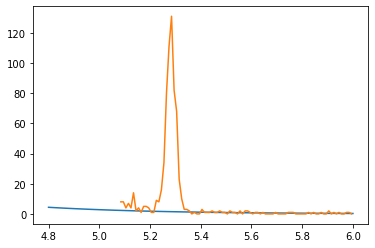

In [95]:
exp_mass = []
exp_counts = []
print(upper_expo)
for i in range(0,len(invar_mass_plus)):
    # Get region of graph where background dominates
    if invar_mass_plus[i] >= 5.35 and invar_mass_plus[i] <= upper_expo:
        exp_mass.append(invar_mass_plus[i])
        exp_counts.append(counts_plus[i])
    
# Fit exponential

exp_init_coeffs_plus, cov = curve_fit(exponential_func,exp_mass,exp_counts, p0=(1, 1e-6)) 

# Plotting fit
x_fit = np.linspace(4.8,6,100)
y_fit = exponential_func(x_fit,exp_init_coeffs_plus[0],exp_init_coeffs_plus[1])
plt.plot(x_fit,y_fit)
plt.plot(invar_mass_plus,counts_plus)

In [96]:
exp_mass = []
exp_counts = []
for i in range(0,len(invar_mass_minus)):
    # Get region of graph where background dominates
    if invar_mass_minus[i] >= 5.35 and invar_mass_minus[i] <= upper_expo:
        exp_mass.append(invar_mass_minus[i])
        exp_counts.append(counts_minus[i])
    
# Fit exponential
exp_init_coeffs_minus, cov = curve_fit(exponential_func,exp_mass,exp_counts, p0=(1, 1e-6)) 

# Plotting fit
x_fit = np.linspace(4.8,6,100)
y_fit = exponential_func(x_fit,exp_init_coeffs_minus[0],exp_init_coeffs_minus[1])
# plt.plot(x_fit,y_fit)
# plt.plot(invar_mass_minus,counts_minus)

<ipython-input-4-aafaf9275c2e>:8: RuntimeWarning: overflow encountered in exp
  return np.array(N2*np.exp(-beta*(x)))


[8.49425707e+01 5.28253647e+00 1.77670162e-02 1.25301596e+09
 3.79760034e+00]


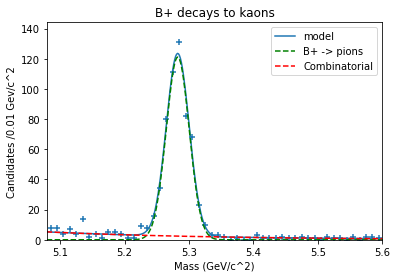

In [97]:
# Educated guess at cruijff coeffs
# alpha and n expected to change the most
# [N, m, sigma , alpha_l, alpha_r]
gauss_init = [3500, 5.29, 0.015]
# Get region where cruijffal and exponential dominate
gauss_mass = []
gauss_counts = []
for i in range(0,len(invar_mass_plus)):
    if invar_mass_plus[i] >= 5.15 and invar_mass_plus[i] <= upper_expo:
        gauss_mass.append(invar_mass_plus[i])
        gauss_counts.append(counts_plus[i])

# Convert to same type as crys_init_coeffs
exp_init_coeffs = [exp_init_coeffs_plus[0], exp_init_coeffs_plus[1]]
# Create tuple of initial estimates of the cruijffal and exponential coeffs
p0_init_est = tuple(gauss_init + exp_init_coeffs)
#print(p0_init_est)
#p0_init_est = tuple(cruijff_init + [10000,1])
coeffs_p, cov_p = curve_fit(gauss_exp, gauss_mass, gauss_counts, p0 = p0_init_est)
print(coeffs_p)
fit_x = np.linspace(4.5,6,1000)
fit_y_p = (gauss_exp(fit_x, coeffs_p[0],coeffs_p[1], coeffs_p[2],coeffs_p[3],coeffs_p[4]))

plt.xlim(xmin = 5.08, xmax = 5.6)
plt.ylim(0,counts_plus.max() * 1.1)
plt.plot(fit_x,fit_y_p, label = "model") # Sum of exp + cruijff
plt.scatter(invar_mass_plus,counts_plus,marker= "+") # Raw data
plt.plot(fit_x, gaussian_func(fit_x,coeffs_p[0],coeffs_p[1], coeffs_p[2]),"g--", label = "B+ -> pions") # Crytal alone
plt.plot(fit_x,coeffs_p[3]*np.exp(-coeffs_p[4]*fit_x),"r--", label = "Combinatorial") # Exp alone
plt.legend()
plt.xlabel("Mass (GeV/c^2)")
plt.ylabel("Candidates /0.01 Gev/c^2")
plt.title("B+ decays to kaons")
plt.show()

[5.23819229e+01 5.28278564e+00 1.59498324e-02 8.65575482e+09
 4.13943693e+00]


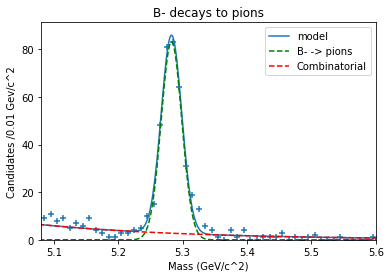

In [98]:
# Educated guess at cruijff coeffs
# alpha and n expected to change the most
# [N, m, sigma , alpha_l, alpha_r]
gauss_init = [3500, 5.29, 0.015]
# Get region where cruijffal and exponential dominate
gauss_mass = []
gauss_counts = []
for i in range(0,len(invar_mass_minus)):
    if invar_mass_minus[i] >= 5.15 and invar_mass_minus[i] <= upper_expo:
        gauss_mass.append(invar_mass_minus[i])
        gauss_counts.append(counts_minus[i])

# Convert to same type as crys_init_coeffs
exp_init_coeffs = [exp_init_coeffs_minus[0], exp_init_coeffs_minus[1]]
# Create tuple of initial estimates of the cruijffal and exponential coeffs
p0_init_est = tuple(gauss_init + exp_init_coeffs)
#print(p0_init_est)
#p0_init_est = tuple(cruijff_init + [10000,1])
coeffs_m, cov_m = curve_fit(gauss_exp, gauss_mass, gauss_counts, p0 = p0_init_est)
print(coeffs_m)
fit_x = np.linspace(4.5,6,1000)
fit_y_m = (gauss_exp(fit_x, coeffs_m[0],coeffs_m[1], coeffs_m[2],coeffs_m[3],coeffs_m[4]))

plt.xlim(xmin = 5.08, xmax = 5.6)
plt.ylim(0,counts_minus.max() * 1.1)
plt.plot(fit_x,fit_y_m, label = "model") # Sum of exp + cruijff
plt.scatter(invar_mass_minus,counts_minus,marker= "+") # Raw data
plt.plot(fit_x, gaussian_func(fit_x,coeffs_m[0],coeffs_m[1], coeffs_m[2]),"g--", label = "B- -> pions") # Crytal alone
plt.plot(fit_x,coeffs_m[3]*np.exp(-coeffs_m[4]*fit_x),"r--", label = "Combinatorial") # Exp alone
plt.legend()
plt.xlabel("Mass (GeV/c^2)")
plt.ylabel("Candidates /0.01 Gev/c^2")
plt.title("B- decays to pions")
plt.show()

In [99]:
# Gaussian reconstruction of 4 - body backround
# mu = ~5.06
# sigma = ~0.5
# N = ~600
gauss_mass_p = []
gauss_counts_p = []
for i in range(0, len(invar_mass_plus)):
    # Guess at valid region unsure if correct 
    if invar_mass_plus[i] >= 5.00 and invar_mass_plus[i] <= 6:  # ?
        gauss_mass_p.append(invar_mass_plus[i])
        gauss_counts_p.append(counts_plus[i])
        
gauss_est = [5, 5.05, 0.05]
x = np.linspace(4,6,100)
model_params_p = []
for par in coeffs_p:
    model_params_p.append(par)
for par in gauss_est:
    model_params_p.append(par)
p0 = tuple(model_params_p)

params_p, cov_p = curve_fit(gauss_exp_gauss, gauss_mass_p, gauss_counts_p, p0 = p0)

In [100]:
gauss_mass_m = []
gauss_counts_m = []
for i in range(0, len(invar_mass_minus)):
    # Guess at valid region unsure if correct 
    if invar_mass_minus[i] >= 5.04 and invar_mass_minus[i] <= 6:  # ?
        gauss_mass_m.append(invar_mass_minus[i])
        gauss_counts_m.append(counts_minus[i])

gauss_est = [500, 5.08, 0.05]
model_params_m = []
for par in coeffs_m:
    model_params_m.append(par)
for par in gauss_est:
    model_params_m.append(par)
p0 = tuple(model_params_m)

params_m, cov_m = curve_fit(gauss_exp_gauss ,gauss_mass_m, gauss_counts_m, p0 = p0)

0.858392022804761
0.9796551959218829
-0.23476409096226789
0.009102100962968708


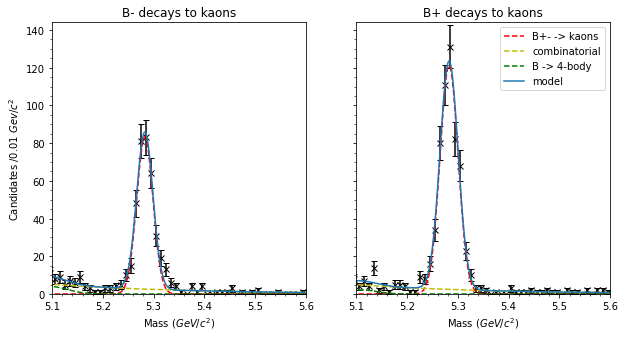

In [101]:
from scipy import integrate
from matplotlib.ticker import AutoMinorLocator


fit_x = np.linspace(4.9,5.6,1000)
gauss_p, exp_p, fbody_p = params_p[0:3], params_p[3:5], params_p[5:8]
gauss_m, exp_m, fbody_m = params_m[0:3], params_m[3:5], params_m[5:8]

fit_y_p = gauss_exp_gauss(fit_x, params_p[0], params_p[1], params_p[2], params_p[3], params_p[4], params_p[5], params_p[6], params_p[7])
fit_y_m = gauss_exp_gauss(fit_x, params_m[0], params_m[1], params_m[2], params_m[3], params_m[4], params_m[5], params_m[6], params_m[7]) 

# Initial plot settings
fig, (axe0,axe1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey = True, sharex = True)
fig.subplots_adjust(hspace=0)
axe0.set_xlim(5.1, 5.6)
axe0.set_ylim(0, counts_plus.max() * 1.1)

# Plot of the B- decay mass
axe0.plot(invar_mass_minus,counts_minus, 'kx') # Raw data
axe0.errorbar(invar_mass_minus,counts_minus,np.sqrt(counts_minus), capsize = 3, ls = "none", c= 'k')
axe0.plot(fit_x,gaussian_func(fit_x, gauss_m[0], gauss_m[1], gauss_m[2]),"r--", label = "B+- -> kaons") 
axe0.plot(fit_x,exp_m[0]*np.exp(-exp_m[1]*fit_x),"y--", label = "combinatorial") 
axe0.plot(fit_x,gaussian_func(fit_x, fbody_m[0], fbody_m[1], fbody_m[2]),"g--", label = "B -> 4-body") 
axe0.plot(fit_x,fit_y_m, label = "model") 
axe0.set_xlabel("Mass $(GeV/c^2)$")
axe0.set_ylabel("Candidates /0.01 $Gev/c^2$")
axe0.set_title("B- decays to kaons")

# Plot of the B+ decay mass
axe1.plot(invar_mass_plus,counts_plus, "kx") # Raw data
axe1.errorbar(invar_mass_plus,counts_plus,np.sqrt(counts_plus), capsize = 3, ls = "none", c= 'k')
axe1.plot(fit_x,gaussian_func(fit_x, gauss_p[0], gauss_p[1], gauss_p[2]),"r--", label = "B+- -> kaons") 
axe1.plot(fit_x,exp_p[0]*np.exp(-exp_p[1]*fit_x),"y--", label = "combinatorial") 
axe1.plot(fit_x,gaussian_func(fit_x, fbody_p[0], fbody_p[1], fbody_p[2]),"g--", label = "B -> 4-body") 
axe1.plot(fit_x,fit_y_p, label = "model") 
axe1.legend()
axe1.set_xlabel("Mass $(GeV/c^2)$")
axe1.set_title("B+ decays to kaons")

axe0.xaxis.set_minor_locator(AutoMinorLocator())
axe0.yaxis.set_minor_locator(AutoMinorLocator())
axe1.xaxis.set_minor_locator(AutoMinorLocator())
axe1.yaxis.set_minor_locator(AutoMinorLocator())

#plt.savefig("..//..//figures//massspectraklocaldown.pdf")

N_p = integrate.quad(gaussian_func, 5.1, 5.5, args = (gauss_p[0],gauss_p[1], gauss_p[2]))[0]
N_m = integrate.quad(gaussian_func, 5.1, 5.5,args = (gauss_m[0], gauss_m[1], gauss_m[2]))[0]
Ne_p = np.sqrt(np.pi * (( (gauss_p[2]**2) * cov_p[0][0] + (gauss_p[0]**2) * cov_p[2][2])))
Ne_m = np.sqrt(np.pi * (( (gauss_m[2]**2) * cov_m[0][0] + (gauss_m[0]**2) * cov_m[2][2])))

#print((N_p+N_m)/(Ne_p**2 +Ne_m**2)**0.5)
errp = (((2*N_m)/(N_m+N_p)**2)**2)*(Ne_p**2)
errm = (((2*N_p)/(N_m+N_p)**2)**2)*(Ne_m**2)
err = np.sqrt((errm+errp))


gauss_mass_tm = []
gauss_counts_tm = []
for i in range(0,len(gauss_counts_m)): # remove 0s
    if gauss_counts_m[i] != 0:
        gauss_mass_tm.append(gauss_mass_m[i])
        gauss_counts_tm.append(gauss_counts_m[i])
        
gauss_mass_tm = np.array(gauss_mass_tm)
gauss_counts_tm = np.array(gauss_counts_tm)
staterrm = np.sqrt(gauss_counts_tm)
fitm = gauss_exp_gauss(gauss_mass_tm, params_m[0], params_m[1], params_m[2], params_m[3], params_m[4], params_m[5], params_m[6], params_m[7])
print(redchi(gauss_counts_tm, fitm, staterrm))

gauss_mass_tp = []
gauss_counts_tp = []
for i in range(0,len(gauss_counts_p)): # remove 0s
    if gauss_counts_p[i] != 0:
        gauss_mass_tp.append(gauss_mass_p[i])
        gauss_counts_tp.append(gauss_counts_p[i])


staterrp = np.sqrt(gauss_counts_tp)
gauss_mass_tp = np.array(gauss_mass_tp)
fitp = gauss_exp_gauss(gauss_mass_tp, params_p[0], params_p[1], params_p[2], params_p[3], params_p[4], params_p[5], params_p[6], params_p[7])
print(redchi(gauss_counts_tp, fitp, staterrp))


print((N_m-N_p)/(N_m+N_p))
print(err)